In [1]:
# Trevor McGlaflin and Sam Noel
# April 3, 2022
# Predicting Employee Churn
# CS/STAT 287

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# read in data
df = pd.read_csv('ChurnData.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [28]:
# Transform Data
df['Attrition'] = np.where(df['Attrition'] == "Yes", 1, 0)
df['Gender'] = np.where(df['Gender'] == "Male", 1, 0)

Text(0.5, 1.0, 'Demographics Correlation Matrix')

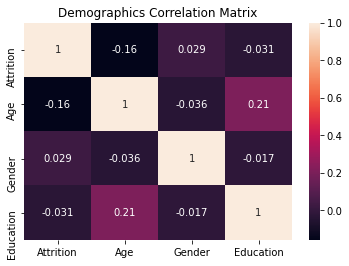

In [30]:
# Exploratory Data Analysis
# Demographics
small_df = df[['Attrition', 'Age', 'Gender', 'Education']]
heat_map = sns.heatmap(small_df.corr(), annot=True)
heat_map.set_title("Demographics Correlation Matrix")

# Job Factors
small_df = df[['Attrition', 'Age', 'Gender', 'Education']]
heat_map = sns.heatmap(small_df.corr(), annot=True)
heat_map.set_title("Demographics Correlation Matrix")